<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 174.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 126.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 140.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [24]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [5]:
## Write your code here
df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])
df['RemoteWork'] 

0                                      Remote
1                                      Remote
2                                      Remote
3        Hybrid (some remote, some in-person)
4        Hybrid (some remote, some in-person)
                         ...                 
65432                                  Remote
65433                                  Remote
65434                               In-person
65435    Hybrid (some remote, some in-person)
65436    Hybrid (some remote, some in-person)
Name: RemoteWork, Length: 65437, dtype: object

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [6]:
## Write your code here

df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', 1)
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', 50)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].median())

## Create experience Ranges
df['ExperienceRange'] = pd.cut(
    df['YearsCodePro'],
    bins=[0, 5, 10, 20, float('inf')],
    labels=['0-5', '5-10', '10-20', '>20'],
    right=False
)

##  Calculate Median Satisfaction per Experience Range
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()
print(median_job_sat)

ExperienceRange
0-5      8.0
5-10     8.0
10-20    8.0
>20      8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_300/3896892331.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()


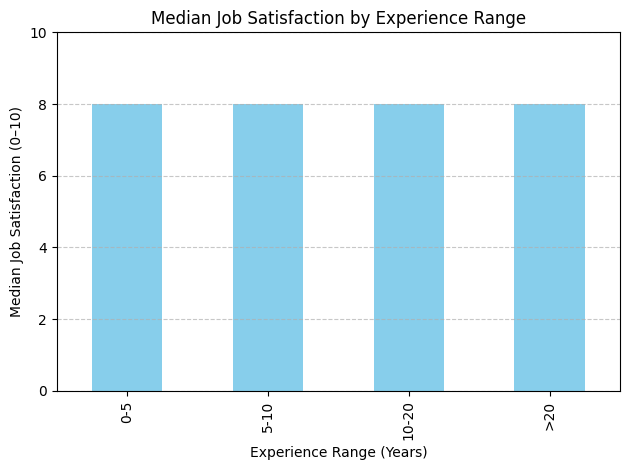

In [7]:
import matplotlib.pyplot as plt

median_job_sat.plot(kind='bar', color='skyblue')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction (0–10)')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


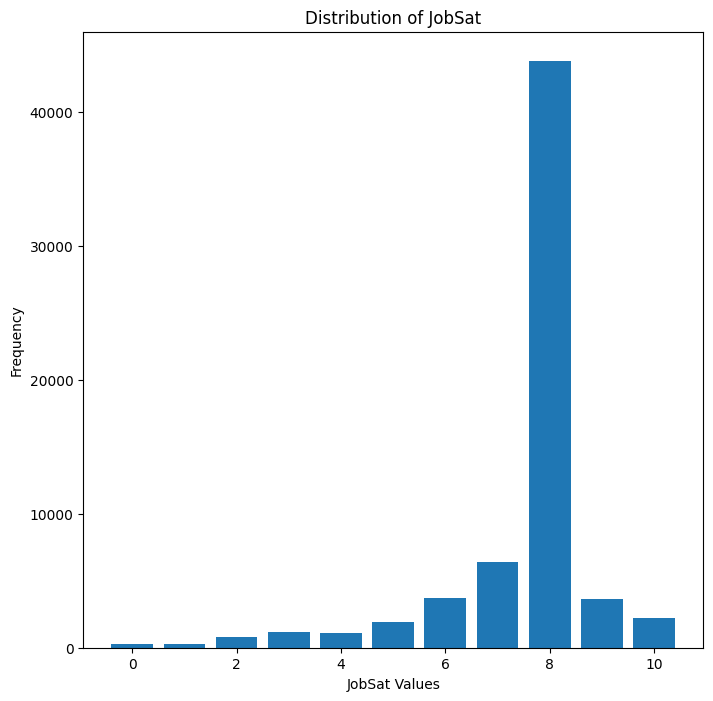

In [8]:
## Write your code here
JobSat_grouped = df.groupby('JobSat').size()
plt.figure(figsize=(8,8))
plt.bar(JobSat_grouped.index, JobSat_grouped.values)
plt.title("Distribution of JobSat")
plt.xlabel("JobSat Values")
plt.ylabel("Frequency")
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


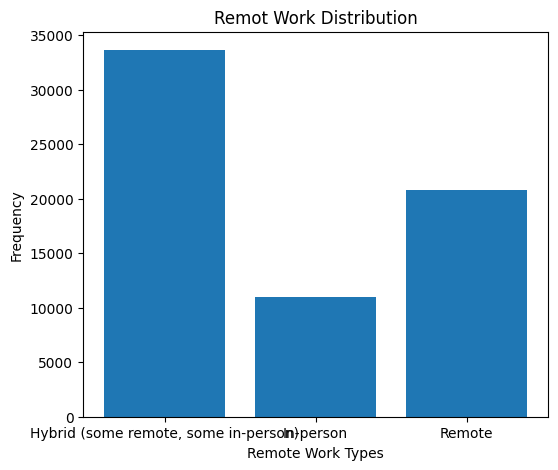

In [9]:
## Write your code here
RemoteWork_count = df.groupby('RemoteWork').size()

plt.figure(figsize=(6,5))
plt.bar(RemoteWork_count.index, RemoteWork_count.values)
plt.title("Remot Work Distribution")
plt.xlabel("Remote Work Types")
plt.ylabel("Frequency")
plt.show()

In [10]:
cross_tab = pd.crosstab(df['Employment'], df['RemoteWork'], margins=True, margins_name="Total")

# Print the cross-tabulated result
cross_tab.reset_index(inplace=False)

RemoteWork,Employment,"Hybrid (some remote, some in-person)",In-person,Remote,Total
0,"Employed, full-time",17296,8552,13193,39041
1,"Employed, full-time;Employed, part-time",85,32,95,212
2,"Employed, full-time;Independent contractor, fr...",1330,366,1861,3557
3,"Employed, full-time;Independent contractor, fr...",80,17,87,184
4,"Employed, full-time;Independent contractor, fr...",0,1,0,1
...,...,...,...,...,...
106,"Student, full-time;Student, part-time;Retired",2,0,0,2
107,"Student, part-time",494,0,0,494
108,"Student, part-time;Employed, part-time",282,179,97,558
109,"Student, part-time;Retired",4,0,0,4


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [25]:
df = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Split languages into lists
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')

# Explode to make one language per row
df_exploded = df.explode('LanguageHaveWorkedWith')
df_exploded

,Country,LanguageHaveWorkedWith
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells)
1,United Kingdom of Great Britain and Northern I...,Go
1,United Kingdom of Great Britain and Northern I...,HTML/CSS
1,United Kingdom of Great Britain and Northern I...,Java
1,United Kingdom of Great Britain and Northern I...,JavaScript
...,...,...
65435,Germany,Lua
65435,Germany,Objective-C
65435,Germany,Python
65435,Germany,Rust


In [27]:
# Group by country and language
language_counts = df_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Pivot to create a heatmap-friendly DataFrame
heatmap_data = language_counts.pivot(index='Country', columns='LanguageHaveWorkedWith', values='Count').fillna(0)

# Optional: normalize per row (percentage)
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

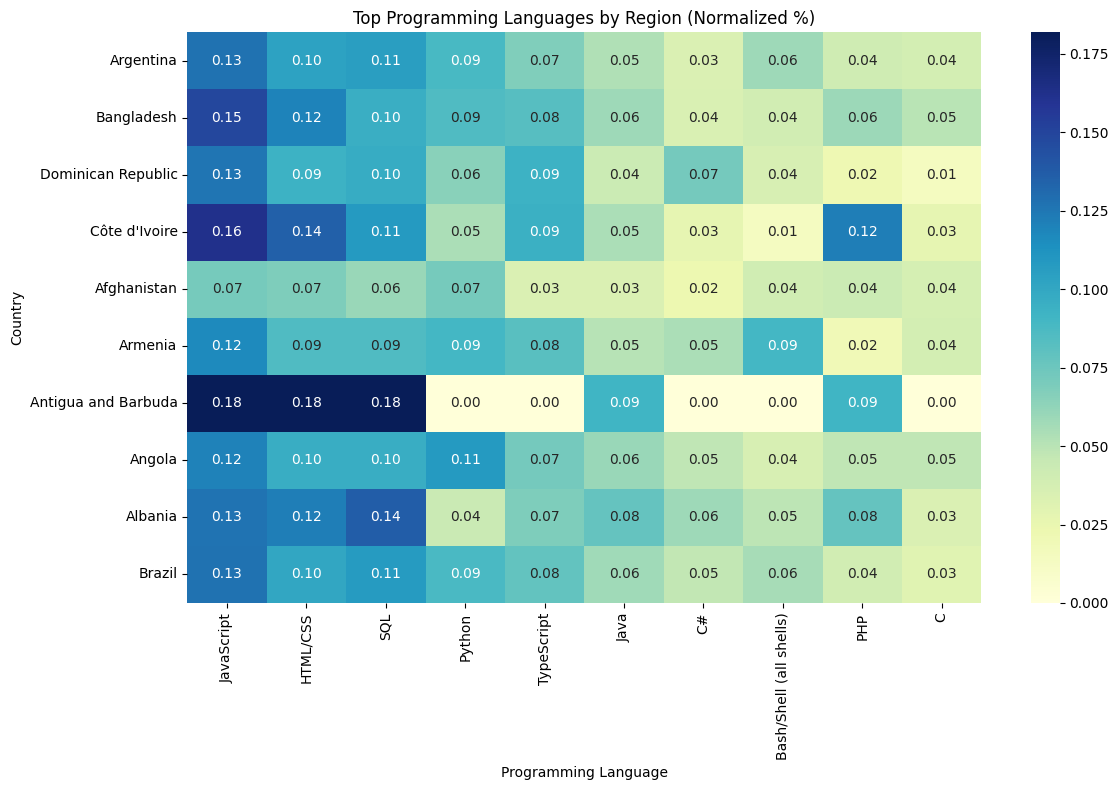

In [28]:
top_countries = heatmap_data_normalized.sum(axis=1).sort_values(ascending=False).head(10).index
top_languages = heatmap_data_normalized.sum(axis=0).sort_values(ascending=False).head(10).index

# Filter data
filtered_data = heatmap_data_normalized.loc[top_countries, top_languages]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Top Programming Languages by Region (Normalized %)")
plt.ylabel("Country")
plt.xlabel("Programming Language")
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Correlation between  & YearsCodePro & JobSatPoints_1 =  -0.029591093976028826


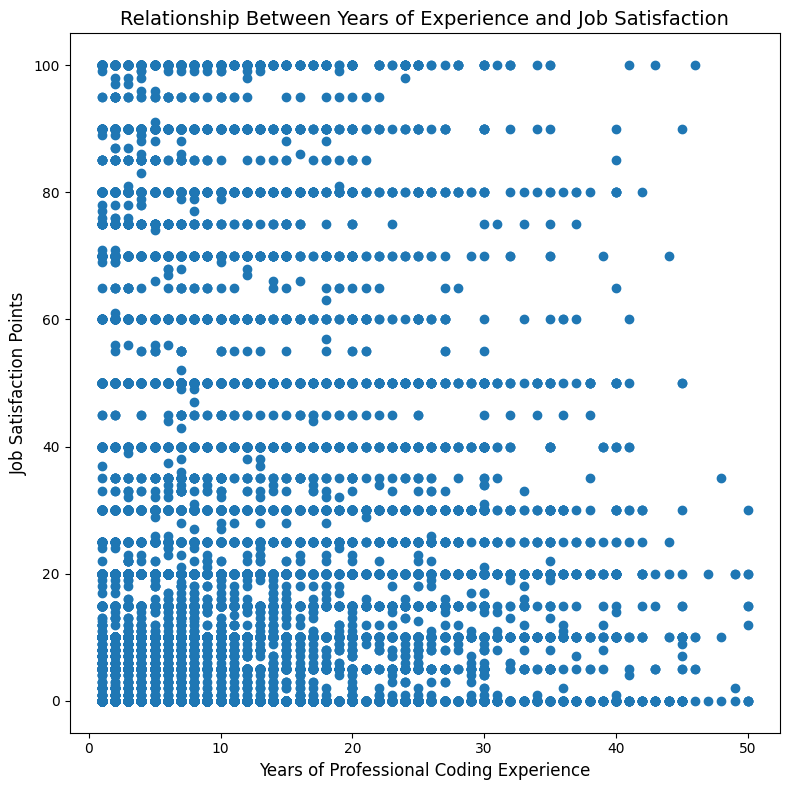

In [13]:
## Write your code here
print("Correlation between  & YearsCodePro & JobSatPoints_1 = ", df['YearsCodePro'].corr(df['JobSatPoints_1']))

plt.figure(figsize=(8,8))
plt.scatter(df['YearsCodePro'], df['JobSatPoints_1'])
plt.title('Relationship Between Years of Experience and Job Satisfaction', fontsize=14)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)

plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


<Figure size 1000x800 with 0 Axes>

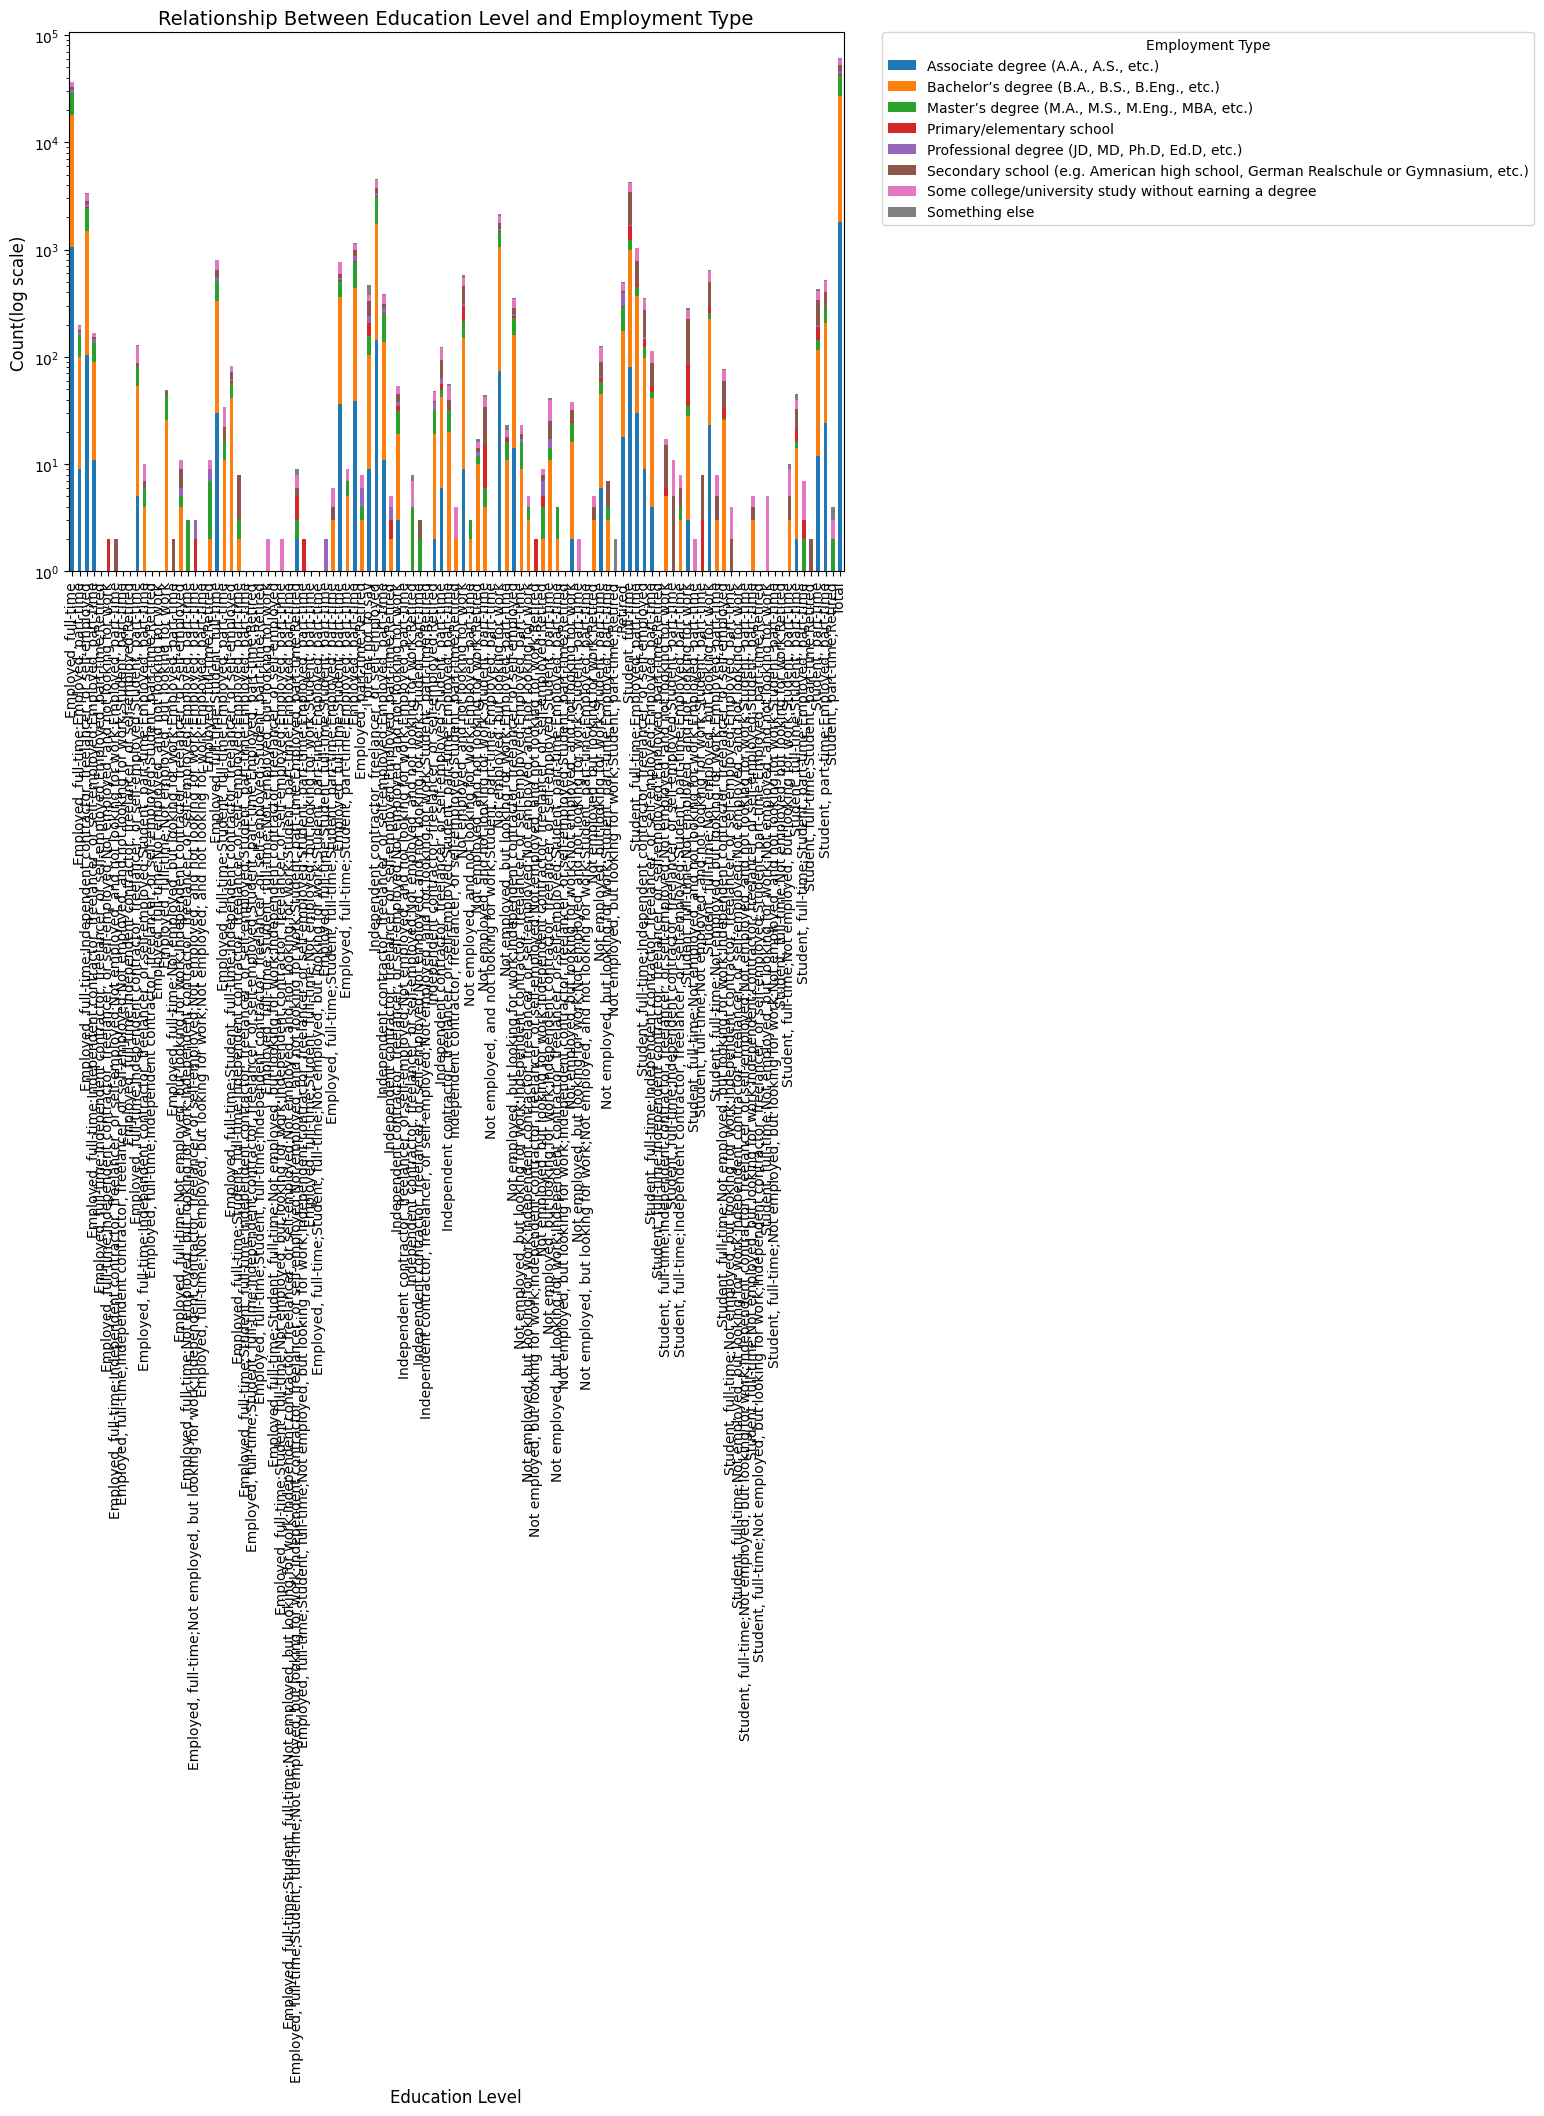

In [14]:
## Write your code here
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'], margins=True, margins_name='Total')

plt.figure(figsize=(10,8))
cross_tab.drop('Total', axis=1).plot(kind='bar', stacked=True,  figsize=(10, 7))

plt.yscale('log')

# Customize the plot
plt.title('Relationship Between Education Level and Employment Type', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count(log scale)', fontsize=12)

plt.legend(title='Employment Type', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show the plot
#plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [15]:
## Write your code here
df.to_csv('modified_df', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
